<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21617C" size=6px>
                    <b>Cycle test 3 Component<br>
                    </b>
                </font>
                <font color="#21612C" size=5px>
                    <b>PDS Assignment 1<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Student Name: Priyadarsshini S - DS2022 batch**

## I. Read the Dataset ‘modifiedfifa.csv' and answer the following questions. (15 marks)


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
d_fifa=pd.read_csv('modifiedfifa.csv')
d_fifa.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight
0,0,16,Luis Garc¡a,37,Spain,71,71,KAS Eupen,750.0,?6K,1906,Right,1.0,4.0,3.0,Medium/ Medium,Lean,No,RCM,10.0,19-Jul-14,2019,70,143
1,1,41,Iniesta,34,Spain,86,86,Vissel Kobe,21500.0,?21K,2058,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,8.0,16-Jul-18,2021,67,150
2,2,80,E. Belzo?lu,37,Turkey,79,79,Medipol Ba?ak?ehir FK,4000.0,?23K,2047,Left,2.0,4.0,4.0,Medium/ Medium,Stocky,No,CM,5.0,9-Jul-15,2019,67,159
3,3,164,G. Pinzi,37,Italy,70,70,Padova,240.0,?2K,1882,Right,2.0,3.0,3.0,Low/ High,Normal,No,LCM,11.0,31-Aug-17,2019,71,168
4,4,657,D. Vaughan,35,Wales,66,66,Notts County,150.0,?4K,1781,Left,1.0,3.0,2.0,Medium/ High,Stocky,No,CDM,8.0,6-Jul-18,2019,66,154


In [4]:
d_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                15114 non-null  int64  
 1   ID                        15114 non-null  int64  
 2   Name                      15114 non-null  object 
 3   Age                       15114 non-null  int64  
 4   Nationality               15114 non-null  object 
 5   Overall                   15114 non-null  int64  
 6   Potential                 15114 non-null  int64  
 7   Club                      15114 non-null  object 
 8   Value                     15114 non-null  float64
 9   Wage                      15114 non-null  object 
 10  Special                   15114 non-null  int64  
 11  Preferred Foot            15114 non-null  object 
 12  International Reputation  15114 non-null  float64
 13  Weak Foot                 15114 non-null  float64
 14  Skill 

In [5]:
d_fifa.shape

(15114, 24)

In [6]:
d_fifa.isnull().sum()

Unnamed: 0                  0
ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
dtype: int64

### 1.	Find how many different countries players data is included in the dataset (1 Mark)

In [7]:
countries = d_fifa['Nationality'].unique()  

# dtype of 'countries' is array.

print("Number of different countries from where players data is included =",len(countries))

Number of different countries from where players data is included = 159


### 2.	Find out highest Valued player from the dataset (1 Mark)

In [8]:
# d_fifa['Value']==d_fifa['Value'].max() --> To get highest value from the dataset.
# .to_string(index=False) --> to return output in string format & without index value.

player_hval = d_fifa[d_fifa['Value']==d_fifa['Value'].max()]['Name'].to_string(index=False)

print("Highest Valued player from the dataset =", player_hval)

Highest Valued player from the dataset =  Neymar Jr


### 3.	Find which country's players data is maximum in the dataset and what’s is the count of it (2 Marks)

In [9]:
country = d_fifa['Nationality'].value_counts().head(1).to_string()

# output of "country": England    1269

c = country.split(' ')

# output of "c": ['England', '', '', '', '1269']

print("The Country whose players are maximum in the dataset is '",c[0],"' and the count is '",c[-1],"'.")

The Country whose players are maximum in the dataset is ' England ' and the count is ' 1269 '.


In [18]:
list1 = [1, 3, 4 ,5 ,6 ]
Final = list( filter ( lambda x : (x%2 == 0), list1)) 
Final


[4, 6]

### 4.	Display top 10 clubs ordered by sum of all player’s current market value of that club (3 Marks)

In [10]:
# First lets add 'Value' with respect to each 'Club'

b = d_fifa.groupby(by='Club')['Value'].sum()

print("Number of 'Club' in dataset =", b.count()) 
print("Sum of 'Value' of each 'Club' : \n",b)

Number of 'Club' in dataset = 651
Sum of 'Value' of each 'Club' : 
 Club
 SSV Jahn Regensburg                    19995.0
1. FC Heidenheim 1846                   24365.0
1. FC Kaiserslautern                    15670.0
1. FC Kln                             127310.0
1. FC Magdeburg                         18125.0
1. FC Nrnberg                          55290.0
1. FC Union Berlin                      39685.0
1. FSV Mainz 05                        124780.0
?l?sk Wroc?aw                            9170.0
AC Ajaccio                              15700.0
AC Horsens                               6675.0
AD Alcorc¢n                             24125.0
ADO Den Haag                            31780.0
AEK Athens                              91450.0
AFC Wimbledon                            6985.0
AIK                                     30085.0
AJ Auxerre                              25695.0
AS Bziers                               8520.0
AS Monaco                              233475.0
AS Nancy Lorrai

In [11]:
# by default, sort_values returns in ascending order. Hence 'ascending=False'

top10_clubs = b.sort_values(ascending=False)
top10_clubs.head(10)

Club
Real Madrid            810600.0
FC Barcelona           807800.0
Juventus               674975.0
Manchester City        668655.0
Paris Saint-Germain    625325.0
Liverpool              569055.0
FC Bayern Mnchen      560225.0
Chelsea                533815.0
Manchester United      529475.0
Tottenham Hotspur      526875.0
Name: Value, dtype: float64

### 5.	Count the number of players having International Reputation ratings = 4 from the clubs 'Real Madrid’ and ‘FC Barcelona’ (3 Marks)

In [12]:
players=d_fifa[(d_fifa['International Reputation']==4)&((d_fifa['Club']=='Real Madrid')|(d_fifa['Club']=='FC Barcelona'))]

print("Number of players having International Reputation ratings has 4 from the Clubs 'Real Madrid’ & ‘FC Barcelona’ =", \
      len(players))

Number of players having International Reputation ratings has 4 from the Clubs 'Real Madrid’ & ‘FC Barcelona’ = 10


### 6.	Find out the names of the youngest and oldest players from the dataset (5 Marks)

In [13]:
youngest_players = d_fifa[d_fifa['Age'] == d_fifa['Age'].min()]['Name']

yp = np.array(youngest_players)

print("Number of youngest players from dataset is", len(yp),"and their age is",d_fifa['Age'].min())

print("Name of youngest players from dataset=\n",yp)

Number of youngest players from dataset is 37 and their age is 16
Name of youngest players from dataset=
 ['J. Imbrechts' 'D. Adshead' 'W. Geubbels' 'J. Italiano' 'B. Worman'
 'J. Lahne' 'R. G¢mez' 'R. Hauge' "L. D'Arrigo" 'Y. Begraoui' 'A. Do?an'
 'B. Mumba' 'N. Ay\x82va' 'B. Nygren' 'J. Cleary' "B. O'Gorman"
 'T. Gundelund' 'M. Larsen' 'A. Taoui' 'M. K\x94stenbauer' 'J. Olstad'
 'F. Tauchhammer' 'Y. Roemer' 'A. Mahlonoko' 'C. Bassett' 'K. Broda'
 'P. Samiec-Talar' 'E. Ceide' 'B. Waine' 'Pelayo Morilla' 'G. Hollywood'
 'M. Tilio' 'G. Nugent' 'L. Smyth' 'Y. Verschaeren' 'H. Massengo'
 'J. Rowland']


In [14]:
oldest_players = d_fifa[d_fifa['Age'] == d_fifa['Age'].max()]['Name']

op = np.array(oldest_players)

print("Number of oldest players from dataset is", len(op),"and their age is",d_fifa['Age'].max())

print("Name of oldest players from dataset=",op)

Number of oldest players from dataset is 2 and their age is 44
Name of oldest players from dataset= ['T. Warner' 'K. Pilkington']


## II. Read the dataset atheletes.csv and regions.csv and answer the following questions.

In [19]:
d_athletes=pd.read_csv('athlete_events.csv')
d_regions=pd.read_csv('regions.csv')

In [16]:
d_athletes.shape

(271116, 15)

In [17]:
d_athletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [18]:
d_regions.shape

(230, 3)

In [19]:
d_regions.head(2)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles


### 1.	Merge the dataset athletes and regions. (2 Marks)

In [20]:
# Outer join is used to merge all contents from both datasets 'athletes' and 'regions'. 

merged_dat = d_athletes.merge(d_regions,on='NOC',how='outer')

print("Shape of 'athletes.csv' =", d_athletes.shape)
print("Shape of Merged data =", merged_dat.shape)

merged_dat.head(5)

Shape of 'athletes.csv' = (271116, 15)
Shape of Merged data = (271117, 17)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602.0,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463.0,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004.0,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464.0,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


### 2.	Show the distribution of the age of gold medallists (4 Marks)

In [21]:
gold_medallist = merged_dat[merged_dat['Medal']=='Gold']['Age']

print("Number of null value in 'gold_medallist'=", gold_medallist.isnull().sum())

Number of null value in 'gold_medallist'= 148


In [22]:
gold_medallist_nonnull=gold_medallist.dropna()

print("Number of null value in 'gold_medallist_nonnull'=", gold_medallist_nonnull.isnull().sum())

Number of null value in 'gold_medallist_nonnull'= 0


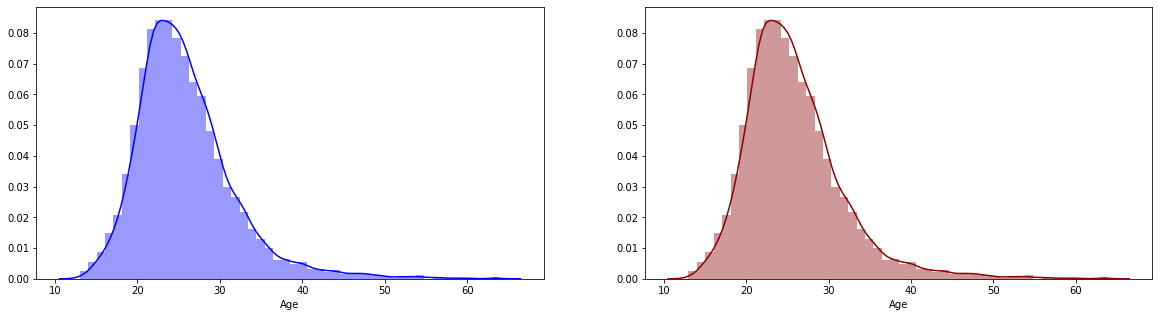

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.distplot(gold_medallist, color="blue",  ax=axes[0])
sns.distplot(gold_medallist_nonnull, color="darkred",  ax=axes[1])
plt.show()

### 3.	Display no of athletes who are gold medallists and whose age is greater than 50 with their info. (4 Marks)


In [24]:
athletes = merged_dat[(merged_dat['Medal']=='Gold') & (merged_dat['Age']>50)]

print("Number of athletes who are 'gold medallists' and whose age is 'greater than 50' =", len(athletes))

Number of athletes who are 'gold medallists' and whose age is 'greater than 50' = 65


In [86]:
athletes.describe()

,ID,Age,Height,Weight,Year
count,65.000000,65.000000,15.000000,14.00000,65.000000
mean,84313.984615,55.338462,178.266667,73.00000,1935.846154
std,40418.385382,3.532337,5.378086,6.78233,34.433464
min,2894.000000,51.000000,165.000000,63.00000,1900.000000
25%,54161.000000,53.000000,175.000000,67.00000,1908.000000
50%,85949.000000,54.000000,178.000000,72.50000,1924.000000
75%,119985.000000,57.000000,183.000000,77.50000,1956.000000
max,133226.000000,64.000000,184.000000,83.00000,2016.000000


In [26]:
# To display their information

merged_dat[(merged_dat['Medal']=='Gold') & (merged_dat['Age']>50)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
7391,85949.0,Anders Peter Nielsen,M,52.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Shooting,"Shooting Men's Military Rifle, Standing, 300 m...",Gold,Denmark,NaN
10718,52626.0,Isaac Lazarus Israls,M,63.0,NaN,NaN,Netherlands,NED,1928 Summer,1928.0,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",Gold,Netherlands,NaN
12975,124220.0,"Hendrikus ""Driekske"" van Bussel",M,51.0,NaN,NaN,Netherlands,NED,1920 Summer,1920.0,Summer,Antwerpen,Archery,"Archery Men's Target Archery, 28 metres, Team",Gold,Netherlands,NaN
19305,32591.0,Everard Coenraad Endt,M,59.0,NaN,NaN,Llanoria,USA,1952 Summer,1952.0,Summer,Helsinki,Sailing,Sailing Mixed 6 metres,Gold,USA,NaN
22547,53238.0,Charles Jacobus,M,64.0,NaN,NaN,United States,USA,1904 Summer,1904.0,Summer,St. Louis,Roque,Roque Men's Singles,Gold,USA,NaN
27945,95906.0,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904.0,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
30110,112065.0,Paul Hurlburt Smart,M,56.0,NaN,NaN,Hilarius,USA,1948 Summer,1948.0,Summer,London,Sailing,Sailing Mixed Two Person Keelboat,Gold,USA,NaN
30405,113773.0,"Galen Carter ""G. C."" Spencer",M,63.0,165.0,NaN,Potomac Archers,USA,1904 Summer,1904.0,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA,NaN
31362,119962.0,"William Henry ""Will"" Thompson",M,56.0,NaN,NaN,Potomac Archers,USA,1904 Summer,1904.0,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA,NaN
32775,130662.0,"Robert W. Williams, Jr.",M,63.0,NaN,NaN,Potomac Archers,USA,1904 Summer,1904.0,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA,NaN


### 4.	Women who can play in summer (2 Marks) 

In [29]:
women = merged_dat[(merged_dat['Sex']=='F') & (merged_dat['Season']=='Summer')][['Name','ID']]
women.head(5)

,Name,ID
4,Ai Yanhan,1464.0
5,Ai Yanhan,1464.0
12,An Zhongxin,3611.0
13,An Zhongxin,3611.0
17,Ba Yan,6381.0


In [25]:
merged_dat.duplicated().sum()

1385

In [26]:
merged_dat[merged_dat.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
5478,12948.0,Thyra Valborg Boldsen,F,48.0,NaN,NaN,Denmark,DEN,1932 Summer,1932.0,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Denmark,NaN
5540,18252.0,Anne Marie Carl-Nielsen (Brodersen-),F,69.0,NaN,NaN,Denmark,DEN,1932 Summer,1932.0,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Denmark,NaN
5541,18252.0,Anne Marie Carl-Nielsen (Brodersen-),F,69.0,NaN,NaN,Denmark,DEN,1932 Summer,1932.0,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Denmark,NaN
5542,18252.0,Anne Marie Carl-Nielsen (Brodersen-),F,69.0,NaN,NaN,Denmark,DEN,1932 Summer,1932.0,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Denmark,NaN
5543,18252.0,Anne Marie Carl-Nielsen (Brodersen-),F,69.0,NaN,NaN,Denmark,DEN,1932 Summer,1932.0,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Denmark,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249409,127869.0,Adolf Wagner von der Mhl,M,44.0,NaN,NaN,Austria,AUT,1928 Summer,1928.0,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,Austria,NaN
259208,23363.0,Frane Cota,M,25.0,NaN,NaN,Yugoslavia,YUG,1924 Summer,1924.0,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,Serbia,Yugoslavia
259986,64240.0,F. Kroly,M,NaN,NaN,NaN,Yugoslavia,YUG,1924 Summer,1924.0,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,Serbia,Yugoslavia
260363,85115.0,Franjo Neidhardt,M,NaN,NaN,NaN,Yugoslavia,YUG,1948 Summer,1948.0,Summer,London,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Serbia,Yugoslavia


In [30]:
# Above output shows that there is more than entry for the same ID. 

print("Number of women players who can play in Summer=", len(women['ID'].unique()))

Number of women players who can play in Summer= 28851


In [31]:
women_des = women.groupby('ID').describe()
women_des.head(2)

Name                                                
     count unique                                 top freq
ID                                                        
8.0      2      1  Cornelia "Cor" Aalten (-Strannood)    2
13.0     2      1                  Minna Maarit Aalto    2

In [85]:
len(women_des['Name']['top'])

28851

In [33]:
# Printing 'Name' of women players with unique IDs: 

women_des['Name']['top']

ID
8.0          Cornelia "Cor" Aalten (-Strannood)
13.0                         Minna Maarit Aalto
21.0                  Ragnhild Margrethe Aamodt
22.0                              Andreea Aanei
29.0                       Willemien Aardenburg
                           ...                 
135547.0          Viktoriya Viktorovna Zyabkina
135553.0    Galina Ivanovna Zybina (-Fyodorova)
135560.0                      Stavroula Zygouri
135563.0              Olesya Nikolayevna Zykina
135568.0                 Olga Igorevna Zyuzkova
Name: top, Length: 28851, dtype: object

In [34]:
r=women_des['Name']['top']
r.duplicated().sum()

130

### 5.	Display top 5 countries who won most medals. Support your answer with suitable plot. (3 Marks)

In [84]:
# To display number of medals won by each country(region).

countries = merged_dat.groupby('region')['Medal'].count()
countries

region
Afghanistan                            2
Albania                                0
Algeria                               17
American Samoa                         0
Andorra                                0
Angola                                 0
Antigua                                0
Argentina                            274
Armenia                               16
Aruba                                  0
Australia                           1349
Austria                              450
Azerbaijan                            44
Bahamas                               40
Bahrain                                3
Bangladesh                             0
Barbados                               1
Belarus                              139
Belgium                              468
Belize                                 0
Benin                                  0
Bermuda                                1
Bhutan                                 0
Boliva                                 0
Bosnia an

In [89]:
# To display top 5 countries who won most medals

top5_countries = countries.sort_values(ascending=False).head(5)
top5_countries

region
USA        5637
Russia     3947
Germany    3756
UK         2068
France     1777
Name: Medal, dtype: int64

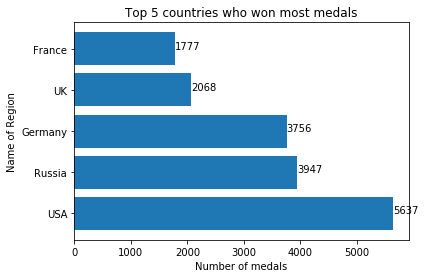

In [88]:
x = top5_countries.index    # Name of region
y = top5_countries.values   # Number of medals in the regions

plt.barh(x, y)

plt.title('Top 5 countries who won most medals')
plt.xlabel("Number of medals")
plt.ylabel("Name of Region")
 
for index, value in enumerate(y):
    plt.text(value, index,str(value))
    
plt.show()